<center>

# `Digits Predictor - Multiclass Logistic Regression`

<img src="../assets/0_to_9.png" alt="Texto alternativo" height="250" width="1500">

</center>


## `What version of scikit-learn do we have?`

In [34]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


## `Import libraries`

In [35]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

## `Load data`

In [36]:
# Load the digits dataset along with labels

from sklearn.datasets import load_digits
data, target = load_digits(n_class=10, return_X_y=True, as_frame=True)


## `About data`

- `Number of Instances` : 1797
- `Number of Attributes`: 64
- `Attribute Information` : 8x8 image of integer pixels in the range 0 to 16.
- `Missing Attribute Values`: None

In [37]:
# Display a random sample of 5 rows from the data

data.sample(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
955,0.0,0.0,7.0,14.0,12.0,1.0,0.0,0.0,0.0,7.0,...,8.0,0.0,0.0,0.0,4.0,14.0,16.0,12.0,1.0,0.0
1430,0.0,0.0,11.0,10.0,8.0,12.0,1.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,14.0,16.0,14.0,7.0,0.0,0.0
321,0.0,0.0,2.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,3.0,10.0,16.0,16.0,7.0,0.0
477,0.0,0.0,9.0,10.0,2.0,0.0,0.0,0.0,0.0,8.0,...,12.0,0.0,0.0,0.0,8.0,14.0,16.0,15.0,6.0,0.0
1138,0.0,0.0,0.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,11.0,0.0,0.0,0.0


In [38]:
# Get unique values in the target variable

target.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [186]:
target.value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

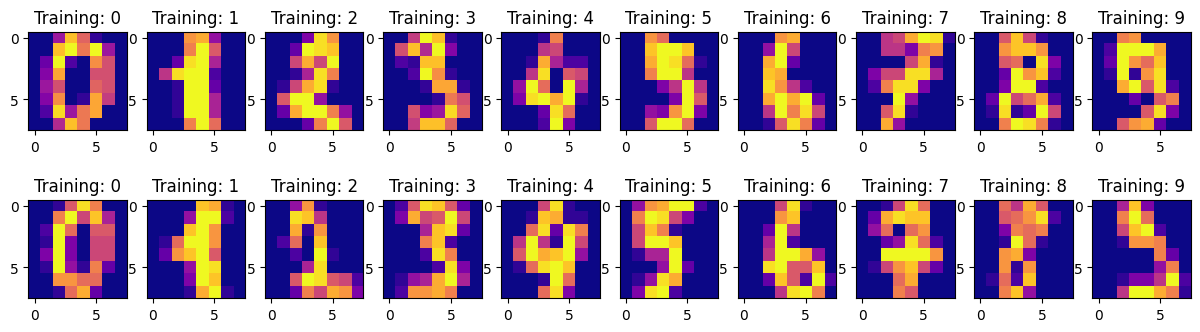

In [39]:
# Create subplots with 2 rows and 10 columns, each representing an image of a digit

_, axes = plt.subplots(nrows=2, ncols=10, figsize=(15, 4))
for i in range(2):
    for j in range(10):
        axes[i,j].imshow(np.reshape(data.loc[i * 10 + j], (8, 8)), cmap='plasma')
        axes[i,j].set_title(f"Training: {target.loc[i * 10 + j]}")

## `Data is balanced`

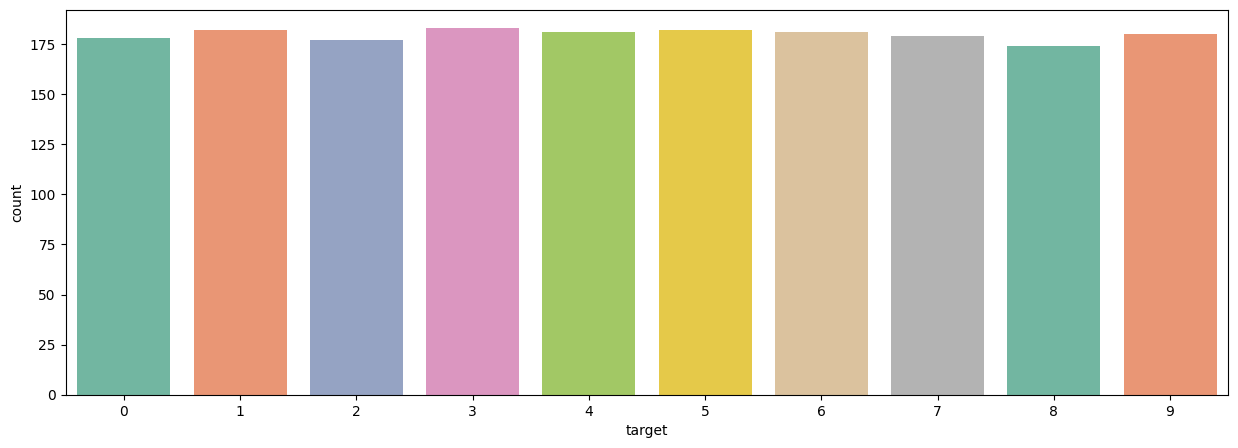

In [40]:
# Create a countplot to show the frequency distribution of each class

plt.figure(figsize=(15,5))
sns.countplot(x=target, palette='Set2', hue=target, legend=False)
plt.show()

## `Split data: train and test`

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=0)

## `Train Model, predict and evaluation`

In [42]:
# Import and train model

from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [43]:
# predict values

predictions = logistic_reg.predict(x_test)

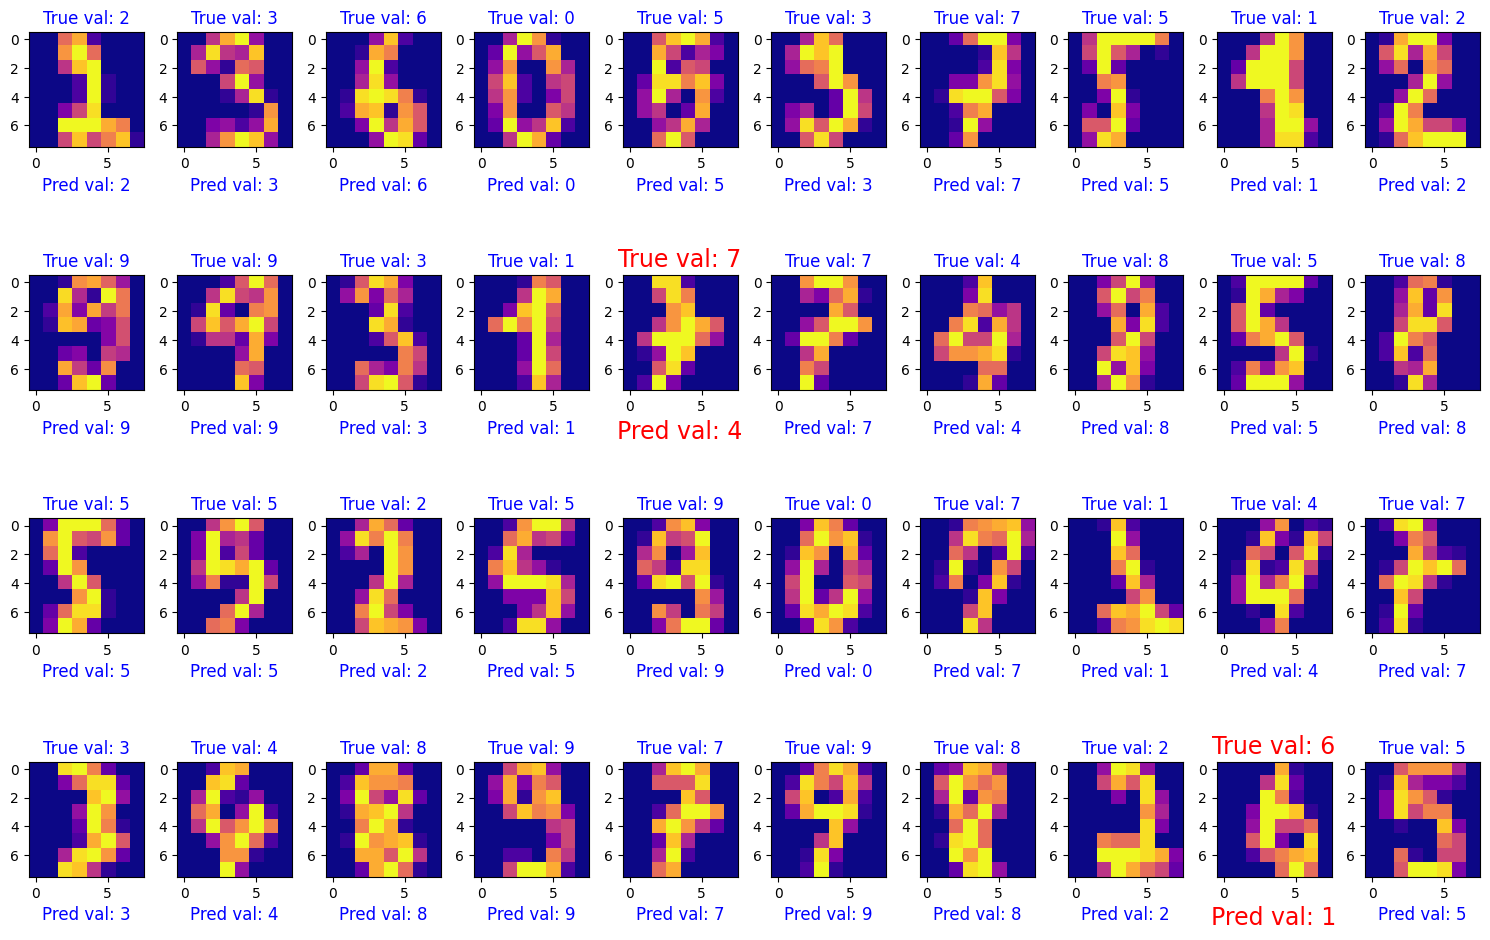

In [161]:
# to show true values and predict values
_, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 10))
for i, index in enumerate(x_test.index[80:120]):
    row = i // 10
    col = i % 10
    axes[row, col].imshow(np.reshape(x_test.loc[index], (8, 8)), cmap='plasma')
    
    if y_test.values[80:120][i] == predictions[80:120][i]:
        axes[row, col].set_title(f"True val: {y_test.values[80:120][i]}", color='blue', fontsize=12)
        axes[row, col].set_xlabel(f"Pred val: {predictions[80:120][i]}", color='blue', fontsize=12)
    else:
        axes[row, col].set_title(f"True val: {y_test.values[80:120][i]}", color='red', fontsize=17)
        axes[row, col].set_xlabel(f"Pred val: {predictions[80:120][i]}", color='red',  fontsize=17)

plt.tight_layout()
plt.show()


# `Metrics`

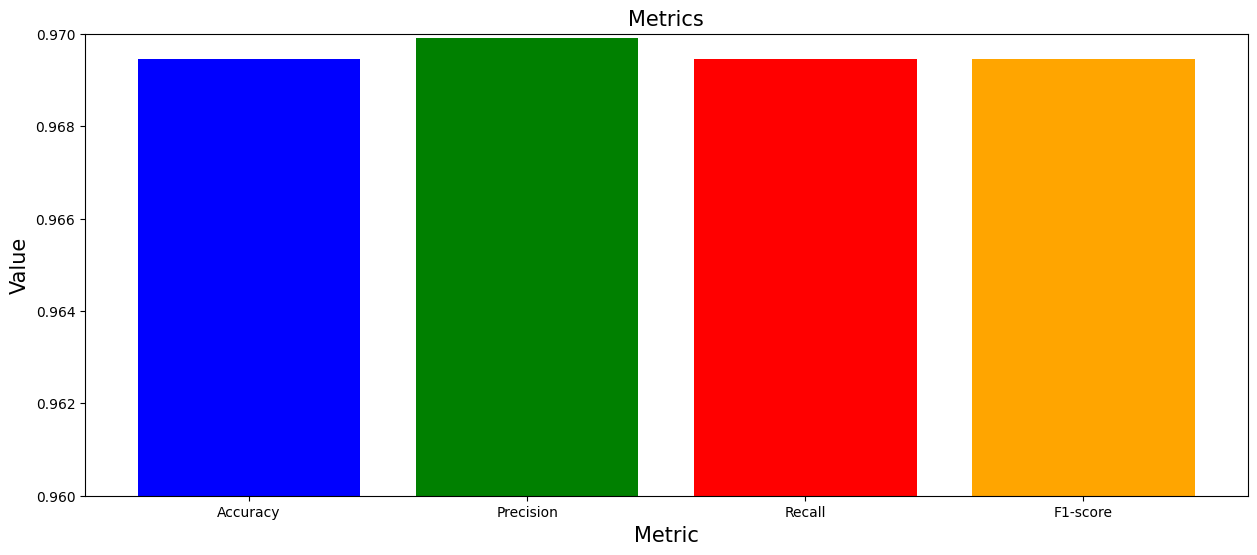

In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Bar Plot
plt.figure(figsize=(15, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.title('Metrics', fontsize=15)
plt.xlabel('Metric', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.ylim(0.96, 0.97)
plt.show()

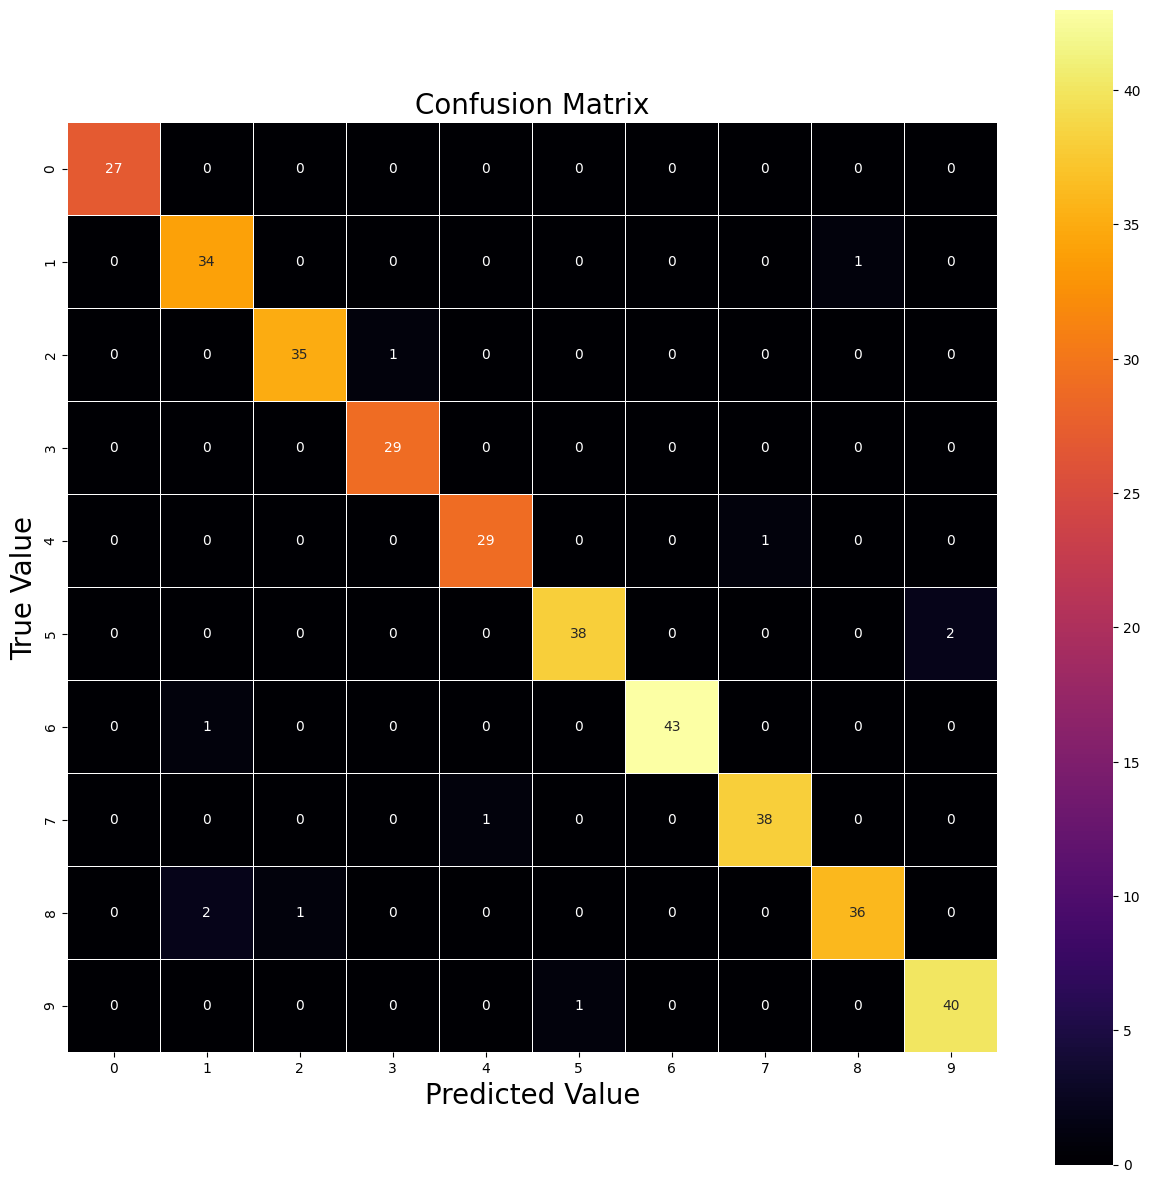

In [185]:
# Import confusion-matrix class

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)

# To show confusion matrix
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='inferno')
plt.title('Confusion Matrix', fontsize=20)
plt.ylabel('True Value', fontsize=20)
plt.xlabel('Predicted Value', fontsize=20)
plt.show()